In [1]:
from tensorflow.examples.tutorials.mnist import input_data

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
%matplotlib notebook
%matplotlib inline

In [2]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# Placeholders
x = tf.placeholder(tf.float32, shape=[None, 784])
x_ = tf.reshape(x, [-1, 28, 28, 1])
y_ = tf.placeholder(tf.float32, shape=[None, 10])


In [3]:
# first conv layer
W_conv1 = weight_variable([12, 12, 1, 25])
b_conv1 = bias_variable([25])
h_conv1 = tf.nn.relu(tf.nn.conv2d(x_, W_conv1, strides=[1, 2, 2, 1], padding='VALID') + b_conv1)

In [4]:
# second conv layer
W_conv2 = weight_variable([5, 5, 25, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(tf.nn.conv2d(h_conv1, W_conv2, strides=[1, 1, 1, 1], padding='SAME') + b_conv2)

In [5]:
# maxpooling
h_pool2 = tf.nn.max_pool(h_conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
print(h_pool2.shape)

(?, 4, 4, 64)


In [6]:
# Fully connected layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 4*4*64])

# relu
W_fc1 = weight_variable([4*4*64, 1024])
b_fc1 = bias_variable([1024])

h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [7]:
# Drop out
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)


# output layer with 10 outputs
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
y_conv = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

In [8]:
# Loss function and Adam optimizer
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(
    logits=y_conv, labels=y_))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


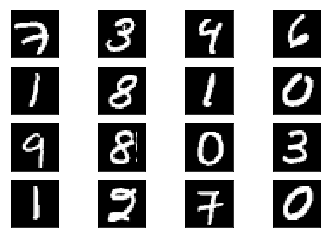

In [9]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)
fig = plt.figure()
for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.imshow(mnist.train.images[i].reshape(28, 28), cmap='Greys_r')

In [10]:
# Start a tf session and run the optimisation algorithm
sess = tf.Session()
sess.run(tf.initialize_all_variables())
for i in range(2000):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(session = sess, feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
        
        print("validation accuracy %g"%accuracy.eval(session = sess, feed_dict={
            x: mnist.validation.images, y_: mnist.validation.labels, keep_prob: 1.0}))
    train_step.run(session = sess, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("\ntest accuracy %g"%accuracy.eval(session = sess,feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Instructions for updating:
Use `tf.global_variables_initializer` instead.
step 0, training accuracy 0.04
validation accuracy 0.1172
step 100, training accuracy 0.08
validation accuracy 0.0958
step 200, training accuracy 0.22
validation accuracy 0.19
step 300, training accuracy 0.14
validation accuracy 0.2032
step 400, training accuracy 0.12
validation accuracy 0.204
step 500, training accuracy 0.14
validation accuracy 0.2058
step 600, training accuracy 0.32
validation accuracy 0.2996
step 700, training accuracy 0.36
validation accuracy 0.3856
step 800, training accuracy 0.32
validation accuracy 0.396
step 900, training accuracy 0.56
validation accuracy 0.3998
step 1000, training accuracy 0.4
validation accuracy 0.5702
step 1100, training accuracy 0.64
validation accuracy 0.635
step 1200, training accuracy 0.76
validation accuracy 0.7462
step 1300, training accuracy 0.74
validation accuracy 0.8328
step 1400, training accuracy 0.78
validation accuracy 0.8414
step 1500, training accuracy 

Shape of W: (12, 12, 1, 25)


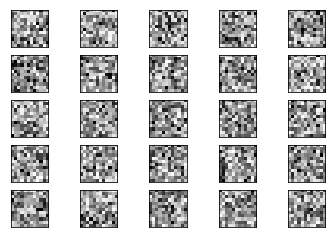

In [11]:
# Visualising filters
# get the weights W_conv1
with sess.as_default():
    W = W_conv1.eval()
    print("Shape of W:",W.shape)
    W = np.transpose(W, [3, 0, 1, 2]) 

    fig = plt.figure()
    for i in range(25):
        ax = fig.add_subplot(5, 5, i + 1)
        ax.set_xticks(())
        ax.set_yticks(())
        ax.imshow(W[i].reshape(12, 12), cmap='Greys_r')
    plt.show()

In [12]:
# Visualising Patches with High Activation
H =  sess.run(h_conv1, feed_dict={x: mnist.test.images})
print(H.shape)

(10000, 9, 9, 25)


In [13]:
H = np.transpose(H, (0, 3, 1, 2))